In [3]:
import sys
import os

sys.path.append(os.path.abspath(".."))


In [4]:
import pandas as pd 
import numpy as np
from analyse_src.missing_value_analysis import SimpleMissingValueAnalysis
from analyse_src.multivariate_analysis import SimpleMultivariateAnalysis
from analyse_src.bivariable_analysis import BivariableAnalysis,NumericalBivariableAnalysis,CategoricalBivariableAnalysis
from analyse_src.univariable_analysis import NumericalUnivariableAnalysis,CategoricalUnivariableAnalysis,UnivariableAnalysis
from analyse_src.basic_data_inspection import DataInspector,AboutData,SummaryStatisticInspectionStrategy

In [5]:
data=pd.read_csv(r"C:\Users\rk186\OneDrive\Desktop\Sleep_health_and_lifestyle\Extracted_data\Sleep_health_and_lifestyle_dataset.csv")
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
data_inspector=DataInspector(AboutData())
data_inspector.execute_inspection(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB

Data types and Non-va

In [6]:
data_summary=DataInspector(strategy=SummaryStatisticInspectionStrategy())
data_summary.execute_inspection(data)


Summary Statistics (Numerical features):
        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   300


Missing value count by column :
Person ID                  False
Gender                     False
Age                        False
Occupation                 False
Sleep Duration             False
Quality of Sleep           False
Physical Activity Level    False
Stress Level               False
BMI Category               False
Blood Pressure             False
Heart Rate                 False
Daily Steps                False
Sleep Disorder              True
dtype: bool
Visualising Null values...


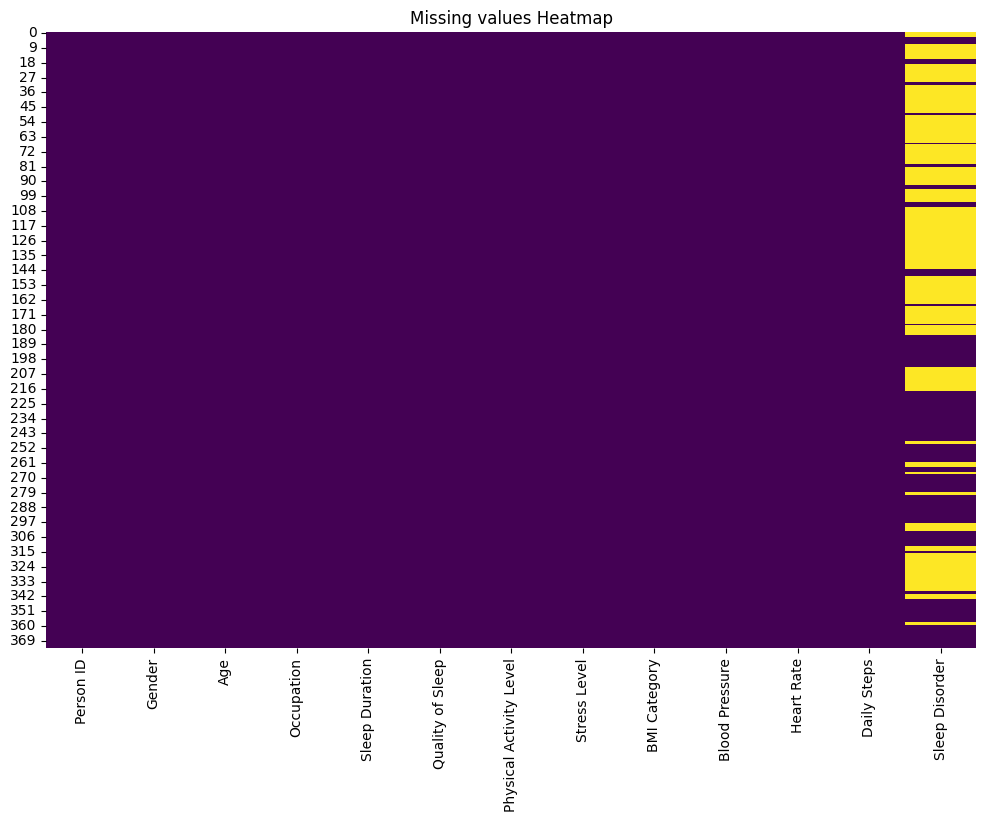

In [7]:
missing_value_analyzer=SimpleMissingValueAnalysis()
missing_value_analyzer.analysis(data)

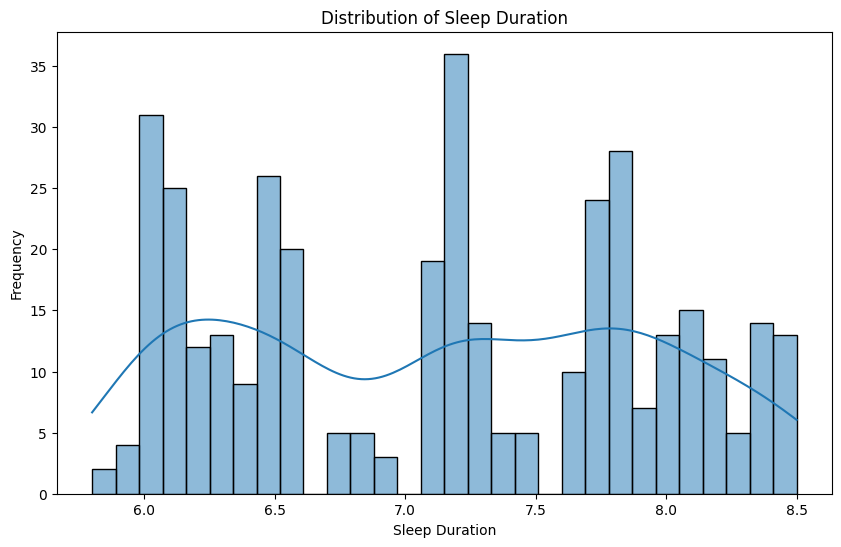

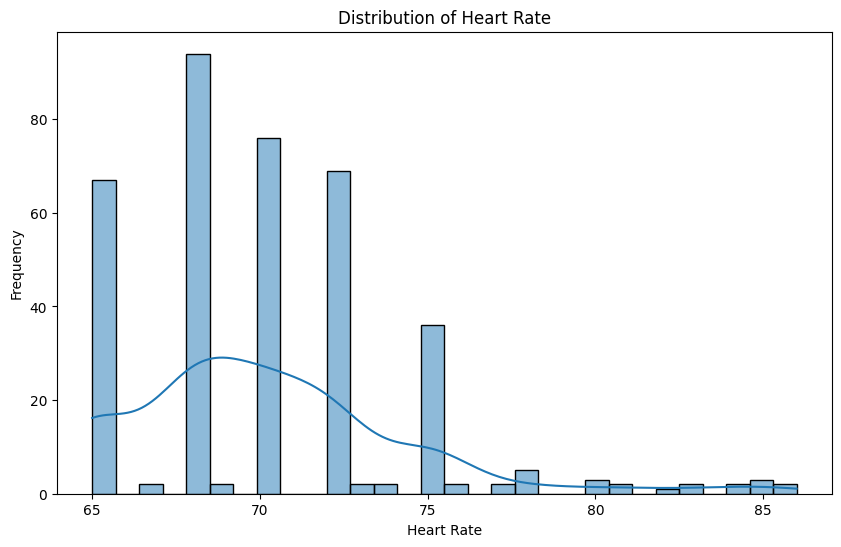

In [8]:
visualise_Univariable=UnivariableAnalysis(NumericalUnivariableAnalysis())
visualise_Univariable.execute_analysis(data,"Sleep Duration")
visualise_Univariable.execute_analysis(data,"Heart Rate")

c:\Users\rk186\OneDrive\Desktop\Sleep_health_and_lifestyle\analyse_src\univariable_analysis.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette="muted")


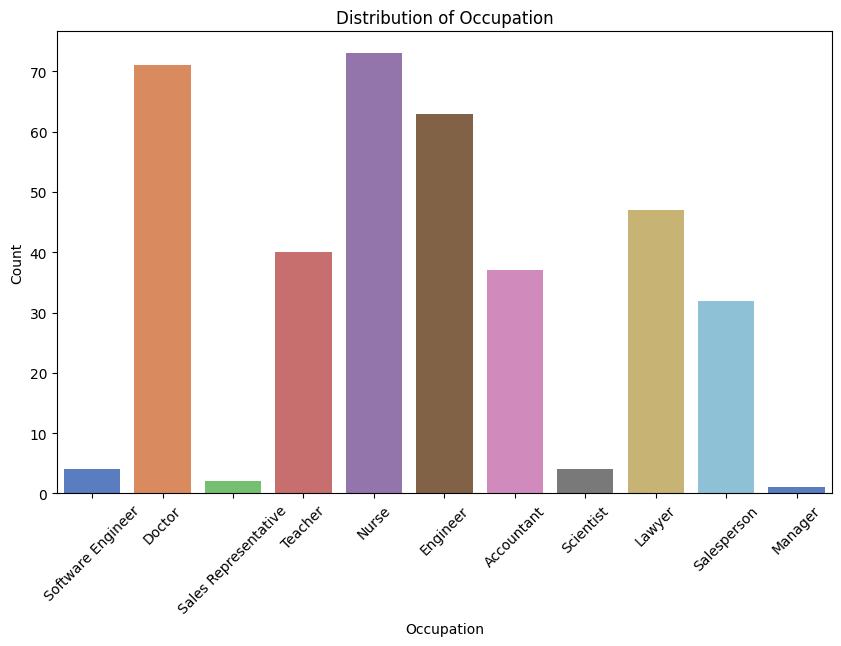

c:\Users\rk186\OneDrive\Desktop\Sleep_health_and_lifestyle\analyse_src\univariable_analysis.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette="muted")


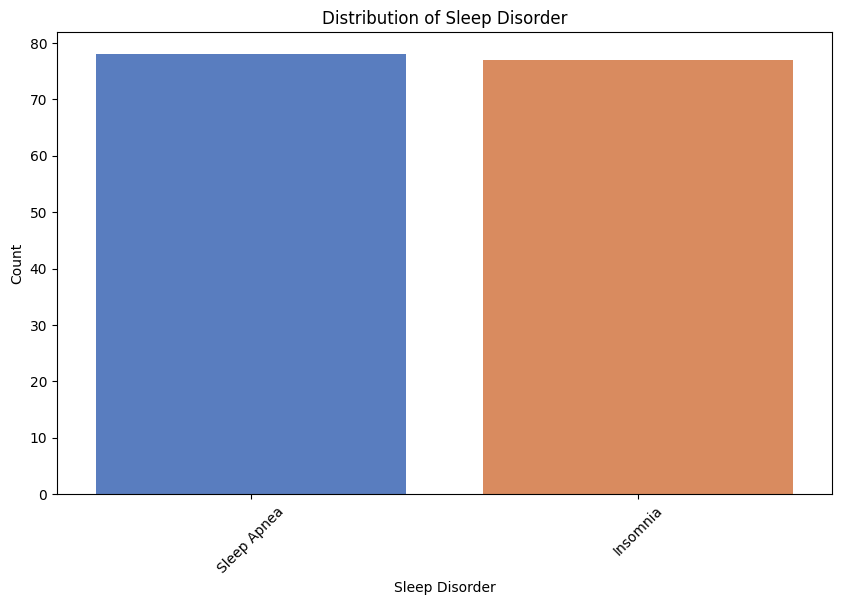

In [9]:
visualise_Univariable.set_strategy(CategoricalUnivariableAnalysis())
visualise_Univariable.execute_analysis(data,"Occupation")
visualise_Univariable.execute_analysis(data,"Sleep Disorder")

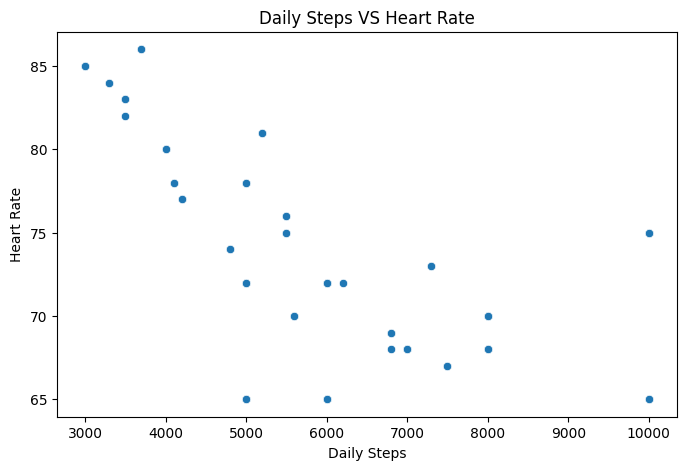

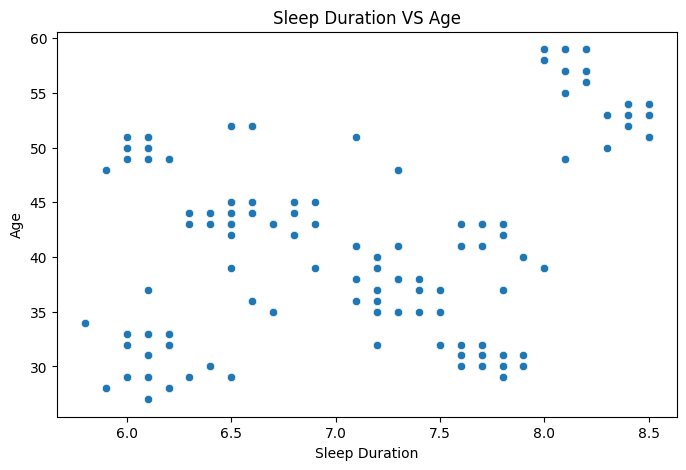

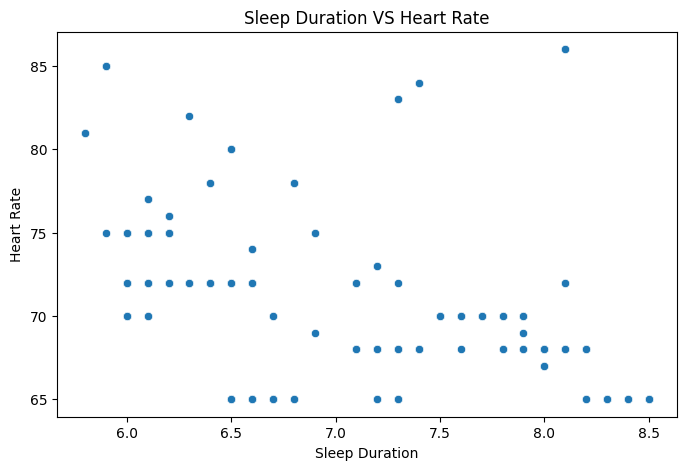

In [10]:
BivariableDataAnalysis=BivariableAnalysis(NumericalBivariableAnalysis())
BivariableDataAnalysis.execute_analysis(df=data,feature1="Daily Steps",feature2="Heart Rate")
BivariableDataAnalysis.execute_analysis(df=data,feature1="Sleep Duration",feature2="Age")
BivariableDataAnalysis.execute_analysis(df=data,feature1="Sleep Duration",feature2="Heart Rate")

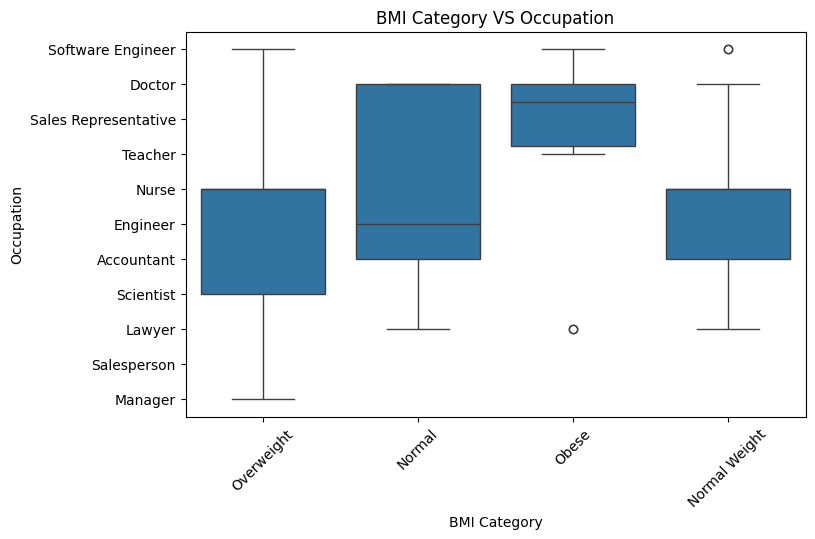

In [11]:
BivariableDataAnalysis.set_strategy(CategoricalBivariableAnalysis())
BivariableDataAnalysis.execute_analysis(df=data,feature1="BMI Category",feature2="Occupation")

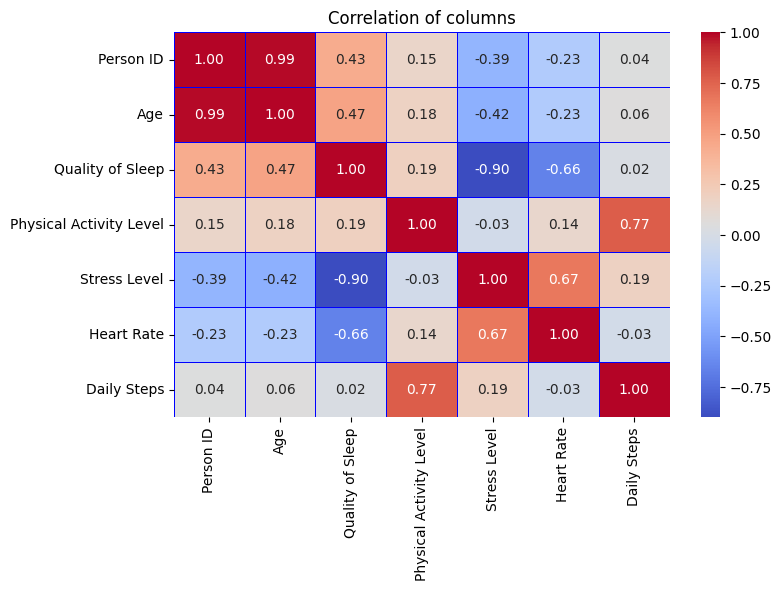

In [12]:
MultivariateAnalysis=SimpleMultivariateAnalysis()
selected_features=data[[x for x in data.select_dtypes(include="int")]]
MultivariateAnalysis.generate_correlation_heatmap(selected_features)

<Figure size 800x500 with 0 Axes>

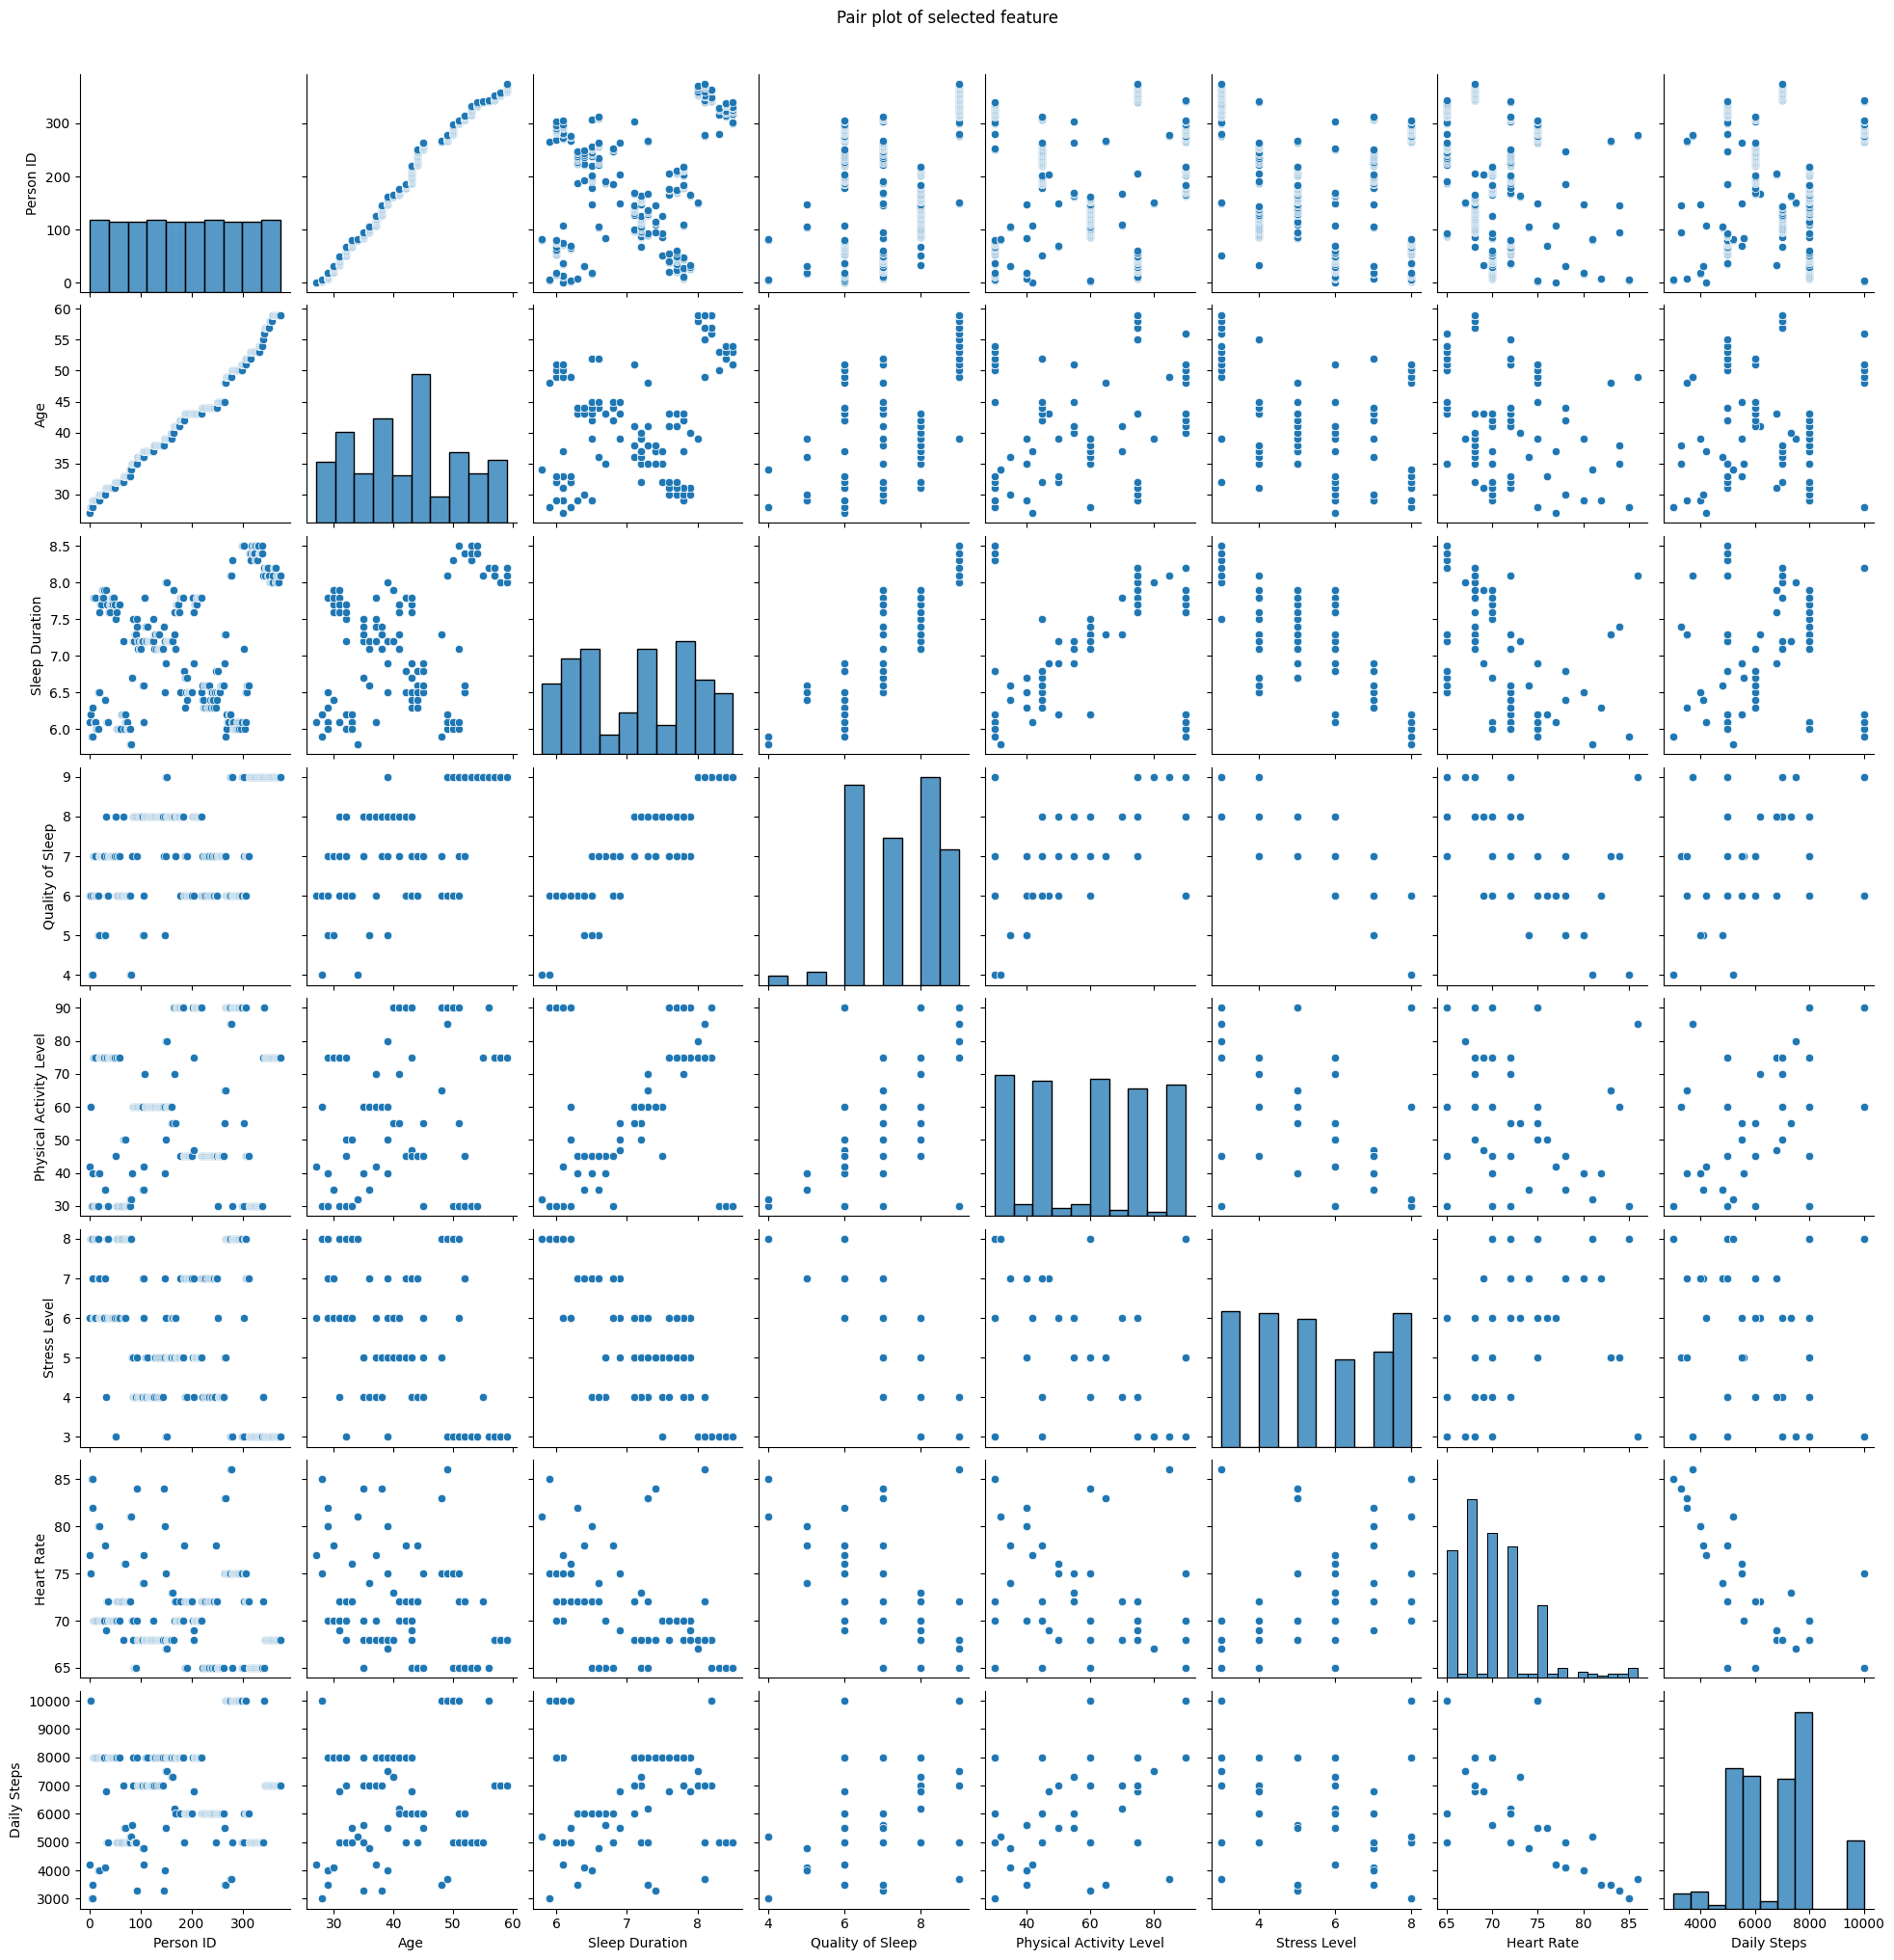

In [13]:
MultivariateAnalysis.geneate_pairplot(data)

In [14]:
data["Sleep Disorder"].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64